In [508]:
import pandas as pd
import numpy as np

from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import KNNImputer, MissingIndicator, SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

from matplotlib import pyplot as plt
import seaborn as sns

In [509]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [510]:
house_data_root = pd.read_csv('./train.csv')

In [511]:
missing_table = pd.DataFrame({
            'count': house_data_root.isnull().sum(),
            'percentage': (house_data_root.isnull().sum() / len(house_data_root['Id'])) * 100
})

In [512]:
missing_table

,count,percentage
Id,0,0.000000
MSSubClass,0,0.000000
MSZoning,0,0.000000
LotFrontage,259,17.739726
LotArea,0,0.000000
Street,0,0.000000
Alley,1369,93.767123
LotShape,0,0.000000
LandContour,0,0.000000
Utilities,0,0.000000


In [513]:
house_data1 = house_data_root.copy()

<h3>delete features that have more than 20% of missing value</h3>

In [514]:
for feature in missing_table.index:
    if (missing_table.loc[feature, 'percentage'] >= 20):
        house_data1.drop(columns=feature, inplace=True)

In [515]:
house_data1.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [516]:
house_data1.shape

(1460, 76)

<h3>TARGET</h3>

In [517]:
y = np.array(house_data1['SalePrice'])
y.shape

(1460,)

<h3>missing value processing and features transforming</h3>

In [518]:
numerical_features = make_column_selector(dtype_include=np.number)
category_features = make_column_selector(dtype_exclude=np.number)

In [519]:
numerical_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
category_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

In [520]:
preprocessor = make_column_transformer((numerical_pipeline, numerical_features),(category_pipeline, category_features))
preprocessor.fit(house_data1.iloc[:, :-1])

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fb42fe94df0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fb42fe94e80>)])

In [521]:
X = preprocessor.transform(house_data1.iloc[:, :-1]).toarray()
X.shape

(1460, 271)

Select best k features that have highest relationship with target

In [522]:
selector = SelectKBest(f_regression, k = 80)
selector.fit(X, y)
X_best = selector.transform(X)
X_best.var(axis=0)

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.16685072, 0.12702008,
       0.22161006, 0.23216129, 0.06380184, 0.02470023, 0.13035982,
       0.02729358, 0.04995825, 0.07140692, 0.01683008, 0.09435354,
       0.21189482, 0.17075389, 0.15751736, 0.0040927 , 0.12797898,
       0.22831441, 0.12118784, 0.12509101, 0.22603866, 0.116725  ,
       0.21189482, 0.24054044, 0.07998499, 0.03434791, 0.2225258 ,
       0.23546819, 0.09      , 0.24567649, 0.24676816, 0.07600816,
       0.24411522, 0.24909176, 0.0833571 , 0.21804232, 0.2043329 ,
       0.24994324, 0.20721336, 0.06083458, 0.06083458, 0.06023832,
       0.07828626, 0.06380184, 0.2402721 , 0.24998827, 0.22708716,
       0.05664102, 0.19480719, 0.18296866, 0.20549634, 0.24909

In [523]:
X_best.shape

(1460, 80)

<h3>Split train set and test set</h3>

In [524]:
x_train, x_test, y_train, y_test = train_test_split(X_best, y, test_size=0.25, random_state=5)
display(x_train.shape)
display(y_train.shape)
display(x_test.shape)
display(y_test.shape)

(1095, 80)

(1095,)

(365, 80)

(365,)

In [525]:
lr = RandomForestRegressor(random_state=5).fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [526]:
print("Mean Squared Error (MSE): {}".format(mean_squared_error(y_test, y_pred)))

Mean Squared Error (MSE): 623045936.7974471


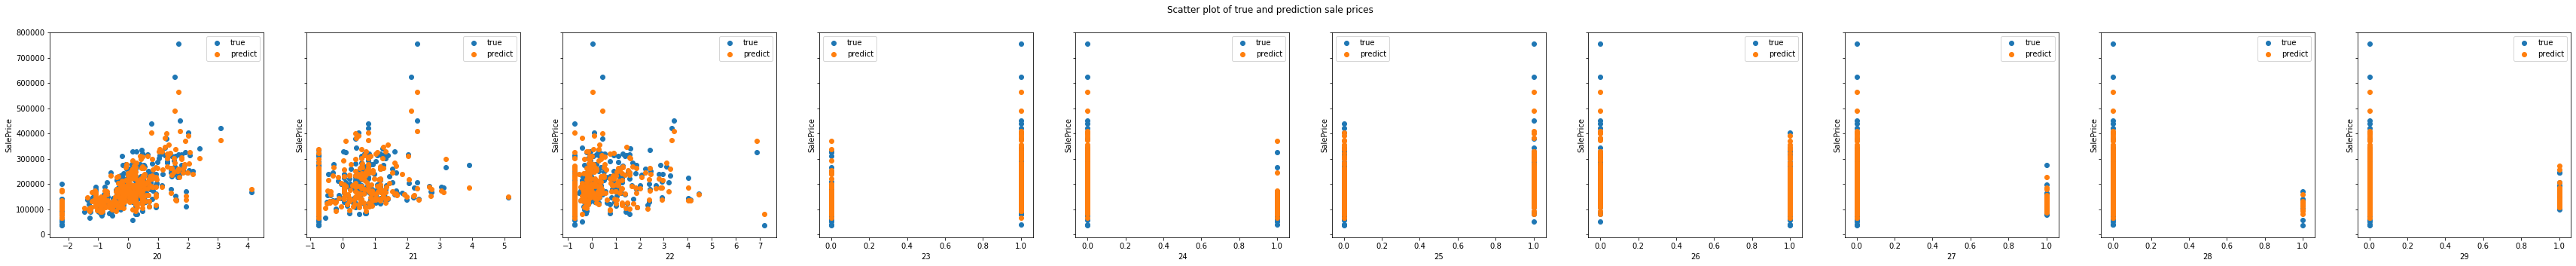

In [527]:
row, col = (1, 30)
start = 20
fig, axes = plt.subplots(row, col - start, figsize=(6 * (col - start), 5), sharey=True)
fig.suptitle("Scatter plot of true and prediction sale prices")

for c in range(start, col):
    axes[c - start].scatter(x_test[:, c], y_test, label="true")
    axes[c - start].scatter(x_test[:, c], y_pred, label="predict")
    axes[c - start].set_xlabel(str(c))
    axes[c - start].set_ylabel("SalePrice")
    axes[c - start].legend()